<a href="https://colab.research.google.com/github/virf96/Neural-Networks/blob/main/Actividad_pt_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import h5py
import numpy as np
import plotly.graph_objects as go 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score

# Carga de dataset

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
train = h5py.File("/content/drive/MyDrive/datasets/train_catvnoncat.h5", "r")
test = h5py.File("/content/drive/MyDrive/datasets/test_catvnoncat.h5", "r")

In [101]:
trainX, trainY = np.array(train["train_set_x"]),np.array(train["train_set_y"])
testX, testY = np.array(test["test_set_x"]),np.array(test["test_set_y"])

# Dimesiones

In [102]:
trainX.shape, trainY.shape

((209, 64, 64, 3), (209,))

In [103]:
testX.shape, testY.shape

((50, 64, 64, 3), (50,))

In [104]:
Counter(trainY)

Counter({0: 137, 1: 72})

no es un gato


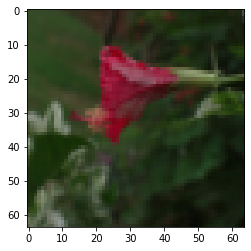

In [105]:
index = 58
print("es un gato") if trainY[index]==1 else print("no es un gato")
plt.imshow(trainX[index,:,:,:])

# Transformar imagenes a vector

In [106]:
trainX.shape

(209, 64, 64, 3)

Las dimensiones del vector resultante serian (numero de observaciones, ancho* alto* canales)

In [107]:
64*64*3

12288

In [108]:
trainX.reshape((209,12288)).shape

(209, 12288)

In [109]:
trainX.reshape((209,-1)).shape

(209, 12288)

#  Escalamos y acomodamos como tablas

In [110]:
trainX_resh = trainX.reshape((209,-1))/255
testX_resh = testX.reshape((50,-1))/255

In [111]:
trainX_resh.shape

(209, 12288)

In [112]:
import tensorflow as tf

In [113]:
from tensorflow.keras.models import Sequential ## Esqueleto del model
from tensorflow.keras.layers import InputLayer ## PlaceHolder de la capa de entrada
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.initializers import random_normal
from tensorflow.keras.optimizers import SGD #Stochastic gradient descent
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam   ## Capa de neuronas normales "Fully conected layer"
from tensorflow.keras.regularizers import l1_l2

In [114]:
print(trainX_resh.shape)
print(testX_resh.shape)

(209, 12288)
(50, 12288)


**Descenso de gradiente por lotes **. El tamaño del lote se establece en el número total de ejemplos en el conjunto de datos de entrenamiento.

**Descenso de gradiente estocástico** . El tamaño del lote se establece en uno.

**Descenso de gradiente de minibatch** . El tamaño del lote se establece en más de uno y menos que el número total de ejemplos en el conjunto de datos de entrenamiento.

In [185]:
from tensorflow.keras.layers import Dropout

In [207]:
model = Sequential()
model.add(InputLayer(input_shape=(12288))) 
model.add(Dense(7, activation="relu",  kernel_regularizer = l1_l2(0.001, 0.01)))
model.add(Dense(10, activation="relu", kernel_regularizer = l1_l2(0.001, 0.01)))
model.add(Dense(15, activation="relu", kernel_regularizer = l1_l2(0.001, 0.01)))
model.add(Dropout(.1))
model.add(Dense(units= 1, activation="sigmoid" , kernel_regularizer = l1_l2(0.001, 0.01)))

model.compile(loss=BinaryCrossentropy(), optimizer = Adam(learning_rate=0.00001),  metrics=["accuracy"])

Descenso de gradiente por lotes : use una tasa de aprendizaje relativamente mayor y más épocas de entrenamiento.

Descenso de gradiente estocástico : use una tasa de aprendizaje relativamente menor y menos épocas de entrenamiento.

In [228]:
history= model.fit( x=trainX_resh,y=trainY, epochs=60, batch_size= 32, validation_data=(testX_resh,testY), use_multiprocessing=True, workers = 12)

Epoch 1/60
7/7 [==============================] - 0s 13ms/step - loss: 0.6488 - accuracy: 0.9378 - val_loss: 0.7293 - val_accuracy: 0.8000
Epoch 2/60
7/7 [==============================] - 0s 8ms/step - loss: 0.6515 - accuracy: 0.9378 - val_loss: 0.7309 - val_accuracy: 0.7800
Epoch 3/60
7/7 [==============================] - 0s 9ms/step - loss: 0.6506 - accuracy: 0.9426 - val_loss: 0.7312 - val_accuracy: 0.7800
Epoch 4/60
7/7 [==============================] - 0s 9ms/step - loss: 0.6481 - accuracy: 0.9378 - val_loss: 0.7295 - val_accuracy: 0.8000
Epoch 5/60
7/7 [==============================] - 0s 8ms/step - loss: 0.6450 - accuracy: 0.9474 - val_loss: 0.7291 - val_accuracy: 0.8000
Epoch 6/60
7/7 [==============================] - 0s 9ms/step - loss: 0.6500 - accuracy: 0.9426 - val_loss: 0.7297 - val_accuracy: 0.8000
Epoch 7/60
7/7 [==============================] - 0s 8ms/step - loss: 0.6487 - accuracy: 0.9330 - val_loss: 0.7302 - val_accuracy: 0.7800
Epoch 8/60
7/7 [=================

In [229]:
trace = go.Scatter(x = np.arange(len(history.history["loss"])), y= history.history["loss"], mode="lines", name="train_loss")
trace2 = go.Scatter(x = np.arange(len(history.history["val_loss"])), y= history.history["val_loss"], mode="lines", name="val_loss")
fig = go.Figure()
fig.add_traces([trace, trace2])
fig.update_layout(dict(title= "Loss"))
fig.show()


In [230]:
trace = go.Scatter(x = np.arange(len(history.history["accuracy"])), y= history.history["accuracy"], mode="lines", name="train_accuracy")
trace2 = go.Scatter(x = np.arange(len(history.history["val_accuracy"])), y= history.history["val_accuracy"], mode="lines", name="val_accuracy")
fig = go.Figure()
fig.add_traces([trace, trace2])
fig.update_layout(dict(title= "Accuracy"))
fig.show()

In [231]:
accuracy_score(testY, model.predict_classes(testX_resh))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



0.8